<a href="https://colab.research.google.com/github/Yaniano/provaML/blob/master/ViniDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importo librerie e mostro versioni
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import keras
import matplotlib.pyplot as plt
import seaborn as sns

print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(keras.__version__)

Using TensorFlow backend.


1.16.3
0.24.2
3.0.3
0.9.0
0.20.3
2.2.4


In [0]:
#carico i dati
path1="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
path2="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white = pd.read_csv(path1, sep=';')
red = pd.read_csv(path2, sep=';')

In [5]:
#struttura dati
print(white.info())
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [8]:
#visione prime e ultime righe del dataframe
print(red.head())
print(white.head())
print(red.head())
print(white.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [11]:
#statistiche base
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
#controllare se e quanti NA ci sono nei dati
print(white.isna().sum())
print(red.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


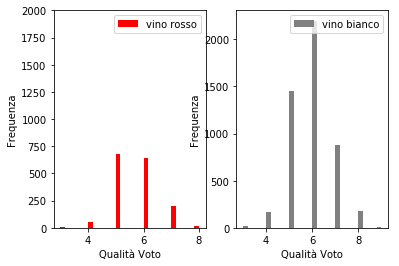

In [15]:
#grafici esplorativi
fig, ax = plt.subplots(1, 2)
ax[0].hist(red.quality, 30, color='red', label="vino rosso")
ax[1].hist(white.quality, 30, color='grey',label="vino bianco")
ax[0].set_ylim([0, 2000])
ax[0].set_xlabel("Qualità Voto")
ax[0].set_ylabel("Frequenza")
ax[1].set_xlabel("Qualità Voto")
ax[1].set_ylabel("Frequenza")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.show()

In [0]:
#aggiungo colonna tipo per distinguere i due tipi di vini e unirne i dataframe
red['colore'] = 1
white['colore'] = 0
vini = red.append(white, ignore_index=True)

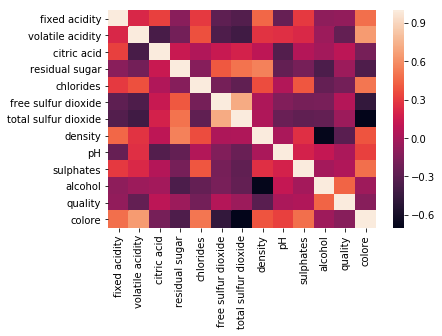

In [17]:
#matrice di correlazione a heatmap
corr = vini.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [0]:
#dividiamo i dati in features e target e dopo li splittiamo tra train e test set
from sklearn.model_selection import train_test_split
features = vini.drop('quality', axis=1) 
target=np.ravel(vini.quality)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

In [19]:
#standardizzo i dati
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train_std = scaler.fit_transform(features_train)
features_test_std = scaler.fit_transform(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
#creazione rete neurale
from keras.models import Sequential
from keras.layers import Dense

network = Sequential()
# input layer
network.add(Dense(50, activation='relu', input_dim = features_train.shape[1]))
# aggiungo 2 hidden layers
network.add(Dense(50, activation='relu'))
network.add(Dense(50, activation='relu'))
network.add(Dense(50, activation='relu'))
# output layer 
network.add(Dense(1))
#compilo la rete neurale e l'alleno sui dati
network.compile(loss="mse", optimizer="RMSprop", metrics=["mse"])

In [83]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 50)                650       
_________________________________________________________________
dense_54 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_55 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_56 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 51        
Total params: 8,351
Trainable params: 8,351
Non-trainable params: 0
_________________________________________________________________


In [87]:
model = network.fit(features_train_std, target_train, batch_size=20, nb_epoch=10, verbose=1, 
                      validation_split=0.2) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 3637 samples, validate on 910 samples
Epoch 1/10
3637/3637 [==============================] - 1s 322us/step - loss: 3.4369 - mean_squared_error: 3.4369 - val_loss: 0.8438 - val_mean_squared_error: 0.8438
Epoch 2/10
3637/3637 [==============================] - 1s 162us/step - loss: 0.7669 - mean_squared_error: 0.7669 - val_loss: 0.6020 - val_mean_squared_error: 0.6020
Epoch 3/10
3637/3637 [==============================] - 1s 159us/step - loss: 0.6085 - mean_squared_error: 0.6085 - val_loss: 0.5704 - val_mean_squared_error: 0.5704
Epoch 4/10
3637/3637 [==============================] - 1s 154us/step - loss: 0.5533 - mean_squared_error: 0.5533 - val_loss: 0.5357 - val_mean_squared_error: 0.5357
Epoch 5/10
3637/3637 [==============================] - 1s 152us/step - loss: 0.5335 - mean_squared_error: 0.5335 - val_loss: 0.5087 - val_mean_squared_error: 0.5087
Epoch 6/10
3637/3637 [==============================] - 1s 153us/step - loss: 0.5193 - mean_squared_error: 0.5193 - val_los

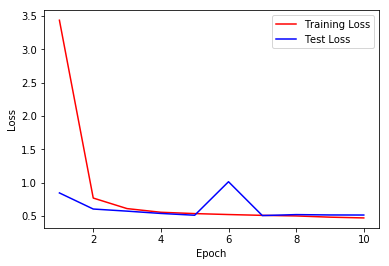

In [88]:
#storia della loss function nel traininig e validation set
training_loss = model.history["loss"]
test_loss = model.history["val_loss"]
#conto il numero degli epoch
epoch_count = range(1, len(training_loss) + 1)
#grafico della storia di training
plt.plot(epoch_count, training_loss, "red")
plt.plot(epoch_count, test_loss, "blue")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [37]:
#previsioni sul test set e confronto
target_prev = network.predict(features_test_std)
veri=np.around(target_prev[:20])
previsti=target_test[:20]
print(pd.DataFrame(zip(veri, previsti), columns=["qualità vera", "qualità prevista"]))
#print(target_test[:20])

   qualità vera  qualità prevista
0         [6.0]                 5
1         [6.0]                 8
2         [6.0]                 6
3         [6.0]                 6
4         [5.0]                 5
5         [5.0]                 7
6         [6.0]                 6
7         [6.0]                 6
8         [6.0]                 7
9         [6.0]                 6
10        [5.0]                 6
11        [7.0]                 7
12        [6.0]                 6
13        [5.0]                 5
14        [6.0]                 5
15        [7.0]                 9
16        [5.0]                 5
17        [6.0]                 7
18        [6.0]                 6
19        [6.0]                 6


In [38]:
#metriche di performance sul test set
mse, mae = network.evaluate(features_test_std, target_test, verbose=1)
print(mse)
print(mae)

1950/1950 [==============================] - 0s 31us/step
0.5248990830396995
0.5248990830396995
